# Context
 A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all 
relevant customer data and develop focused customer retention programs

# Data Description
 Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The 
data set includes information about:
• Customers who left within the last month – the column is called Churn
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and 
streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents

# Objective
 To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the 
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [2]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import pickle

In [ ]:
#loading data 
df1=pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [ ]:
df1.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
905,0781-LKXBR,Male,1,No,No,9,Yes,Yes,Fiber optic,No


In [ ]:
df1.shape

(7043, 10)

In [ ]:
df2.sample()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5215,7845-URHJN,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.15,156.25,Yes


df2.shape 

In [ ]:
df2.shape

(7043, 12)

In [ ]:
df = pd.merge(df1,df2,on='customerID')

In [ ]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
857,2207-NHRJK,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,50.8,50.8,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
print(df1.shape[1])
print(df2.shape[1])
print(df.shape[1] - 1)

10
12
20


In [ ]:
df1.shape[1] + df2.shape[1] -1 == df.shape[1] 

True

In [ ]:
# Checking for duplicacy
df.duplicated().sum()

0

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:ylabel='gender'>

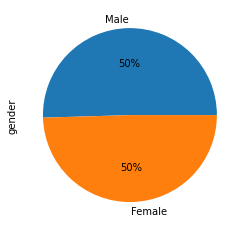

In [ ]:
ax = df.gender.value_counts()
ax.plot(kind='pie',autopct='%.0f%%')
ax.plot()

<AxesSubplot:ylabel='Churn'>

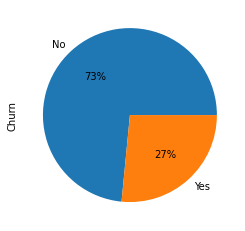

In [ ]:
ax = df.Churn.value_counts()
ax.plot(kind='pie',autopct='%.0f%%')
# ax.plot()

In [ ]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','0').astype('float')

# df['TotalCharges'] = df['TotalCharges'].str.replace(' ',np.float(df['TotalCharges'].mean())).astype('float')

In [ ]:
df['TotalCharges'] = np.where(df['TotalCharges']==0,df['TotalCharges'].mean(),df['TotalCharges'])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
def plot_pie(df):
    df_tmp = pd.DataFrame()
    for i,col in enumerate(df.columns):
        if df[col].dtypes == 'object' and col !='customerID':
            df_tmp[col]= df[col]
            abc = df[col].value_counts()
            plt.pie(abc,autopct='%.0f%%',labels=df_tmp[col].value_counts().index)
            plt.title(col,bbox={'facecolor':'0.9', 'pad':5})
            plt.show()
            print('-'*100)
            

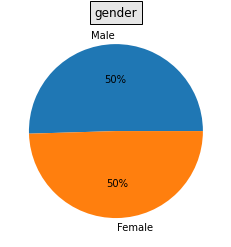

----------------------------------------------------------------------------------------------------


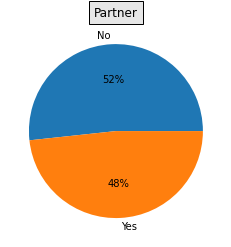

----------------------------------------------------------------------------------------------------


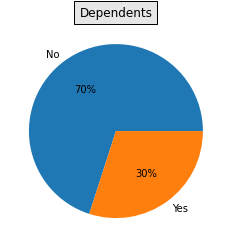

----------------------------------------------------------------------------------------------------


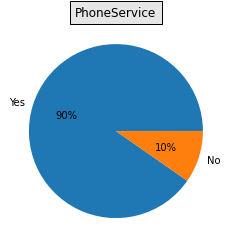

----------------------------------------------------------------------------------------------------


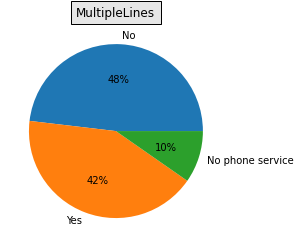

----------------------------------------------------------------------------------------------------


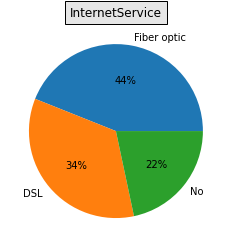

----------------------------------------------------------------------------------------------------


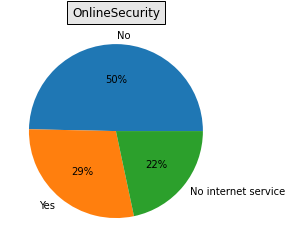

----------------------------------------------------------------------------------------------------


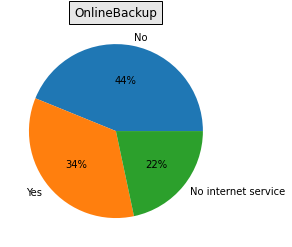

----------------------------------------------------------------------------------------------------


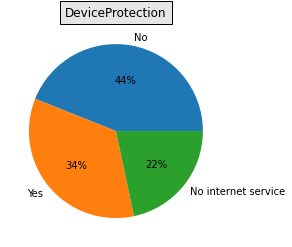

----------------------------------------------------------------------------------------------------


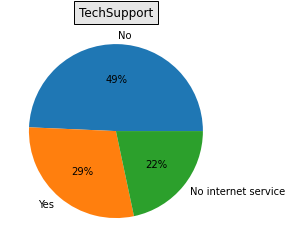

----------------------------------------------------------------------------------------------------


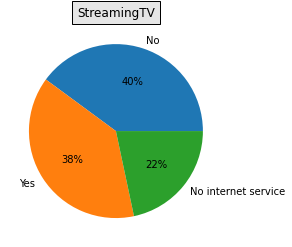

----------------------------------------------------------------------------------------------------


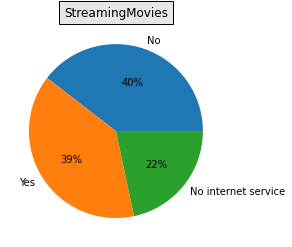

----------------------------------------------------------------------------------------------------


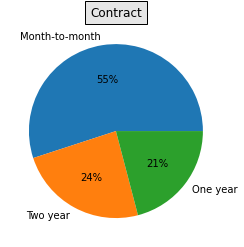

----------------------------------------------------------------------------------------------------


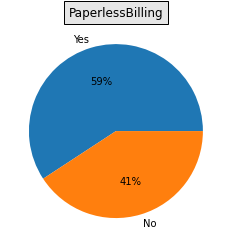

----------------------------------------------------------------------------------------------------


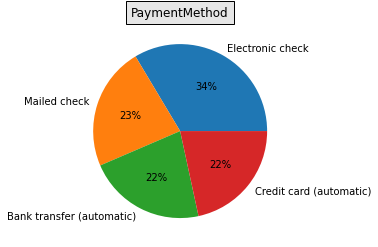

----------------------------------------------------------------------------------------------------


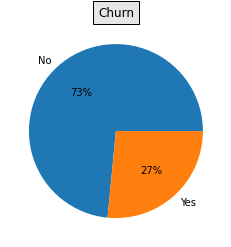

----------------------------------------------------------------------------------------------------


In [ ]:
plot_pie(df)

In [ ]:
def encode_features(df):
    le = LabelEncoder()
    
    for i,col in enumerate(df.columns):
        if df[col].dtypes == 'object' and col !='customerID':
            df[col] = le.fit_transform(df[col])
    return df


In [ ]:
df_new = encode_features(df)

In [ ]:
df_new.drop('customerID',inplace=True,axis=1)

In [ ]:
X = df_new.drop('Churn',axis=1)
y = df_new['Churn'] 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)

In [ ]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1044
           1       0.64      0.48      0.55       365

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
%%time
model = XGBClassifier()
param = {
    'learning_rate': uniform(.05, .1)
    , 'subsample': uniform(.2, .3)
    , 'n_estimators': randint(20, 70)
    , 'min_child_weight': randint(20, 40)
    , 'reg_alpha': uniform(0, .7)
    , 'reg_lambda': uniform(0, .7)
    , 'colsample_bytree': uniform(.1, .7)
    , 'max_depth': randint(2, 6)
}

randomsearch = RandomizedSearchCV(model, param_distributions=param, n_iter=30, n_jobs=-1, scoring='accuracy', return_train_score=True)

randomsearch.fit(x_train, y_train)
print('best score of Randomized Search over 10 iterations:', randomsearch.best_score_)

[22:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score of Randomized Search over 10 iterations: 0.8045809226463
Wall time: 6.31 s


In [ ]:
for k,v in (randomsearch.best_params_).items():
    print("Best value for {0} is {1:.2f}".format(k,v))
    print('-'*50)

Best value for colsample_bytree is 0.63
--------------------------------------------------
Best value for learning_rate is 0.14
--------------------------------------------------
Best value for max_depth is 5.00
--------------------------------------------------
Best value for min_child_weight is 31.00
--------------------------------------------------
Best value for n_estimators is 52.00
--------------------------------------------------
Best value for reg_alpha is 0.49
--------------------------------------------------
Best value for reg_lambda is 0.14
--------------------------------------------------
Best value for subsample is 0.26
--------------------------------------------------


In [ ]:
%%time
param = {
    'learning_rate': [0.005, .1]
    , 'subsample': [.2, .3 ,.4, .5]
    , 'n_estimators': [25, 50]
    , 'min_child_weight': [25]
    , 'reg_alpha': [.3, .4, .5]
    , 'reg_lambda': [.1, .2, .3, .4, .5]
    , 'colsample_bytree': [.66]
    , 'max_depth': [5]
}

model = XGBClassifier(random_state=42, n_jobs=-1) #input hyperparameters without tuning
gridsearch = GridSearchCV(model, param_grid=param, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
gridsearch.fit(x_train, y_train)
print('best score of Grid Search over 120 iterations:', gridsearch.best_score_)

[22:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score of Grid Search over 120 iterations: 0.8020944266950657
Wall time: 46.4 s


In [ ]:
for k,v in (gridsearch.best_params_).items():
    print("Best value for %s is %.2f"%(k,v))
    print('-'*50)

Best value for colsample_bytree is 0.66
--------------------------------------------------
Best value for learning_rate is 0.10
--------------------------------------------------
Best value for max_depth is 5.00
--------------------------------------------------
Best value for min_child_weight is 25.00
--------------------------------------------------
Best value for n_estimators is 50.00
--------------------------------------------------
Best value for reg_alpha is 0.40
--------------------------------------------------
Best value for reg_lambda is 0.30
--------------------------------------------------
Best value for subsample is 0.40
--------------------------------------------------


In [ ]:
rs_pred = randomsearch.predict(x_test)
print(classification_report(y_test,rs_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1044
           1       0.68      0.55      0.61       365

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
gs_pred = gridsearch.predict(x_test)
print(classification_report(y_test,gs_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1044
           1       0.69      0.53      0.60       365

    accuracy                           0.82      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
# Function to preprocesss the data
def preprocess_data(path_to_csv,target_feature):
    df = pd.read_csv(path_to_csv)
    
    # Impute missing values
    missing_values = df.isna().sum()
    missing_list = ((missing_values>0).index).tolist()
    for i in missing_list:
        if df[i].dtypes in ['int64','int32','float64','float32']:
            df[i].fillna(df[i].mean(),inplace=True)
        else: 
            df[i].fillna(mode(df[i])[0][0],inplace=True)
            
    # Impute duplicate values
    df.drop_duplicates(inplace=True)
    
    #Impute unnecessary features
    for col in df.columns:
        unique_percentage = (df[col].value_counts().count()/df.shape[0])*100
        if unique_percentage > 95:
            df.drop(col,inplace=True,axis=1)
        else:
            pass       
    
    return df,target_feature

In [ ]:
# Function to try various models and get performances of all the models
def train_model(preprocessed_df, target_feature):

    # Initialize variables
    le = LabelEncoder()
    model_lst = []
    train_acc_lst = []
    test_acc_lst = []
    test_precision_lst = []
    test_recall_lst = []
        
    # Encode the variables with 'Object' type
    for col in preprocessed_df.columns:
        if preprocessed_df[col].dtype == 'O':
            preprocessed_df[col] = le.fit_transform(preprocessed_df[col])
        else:
            pass
    
    # Split into X & y
    X = preprocessed_df.drop(target_feature,axis=1)
    y = preprocessed_df[target_feature]
    
    # Split into train and test
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
    
    # Intialize models
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    xgb = XGBClassifier()
    ada = AdaBoostClassifier()
    model_list = [lr, dt, ada, xgb]
    
    # Interate through models, train and measure performance
    for idx,i in enumerate(model_list):
        i.fit(x_train,y_train)
        train_pred= i.predict(x_train)
        test_pred = i.predict(x_test)

        train_acc = accuracy_score(y_train,train_pred)
        test_acc = accuracy_score(y_test,test_pred)
        test_precision = precision_score(y_test,test_pred,average='weighted')
        test_recall = recall_score(y_test,test_pred,average='weighted')

        # Update model performance into a DataFrame
        model_lst.append(i)
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        test_precision_lst.append(test_precision)
        test_recall_lst.append(test_recall)
        col_names = ['Model','Train_accuracy','Test_acc','Test_precision','Test_recall']
        model_performance = pd.DataFrame(list(zip(model_lst,train_acc_lst,test_acc_lst,test_precision_lst,test_recall_lst)),columns=col_names)
        
    return model_performance,x_train,y_train

In [ ]:
# Function to pickle the model with best weights
def pickle_model(model_performance,x_train,y_train,file_name):
    best_model = model_performance[model_performance['Train_accuracy']==max(model_performance['Train_accuracy'])]['Model'].iloc[0]
    best_model.fit(x_train,y_train)
    with open(file_name, 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# Main function to call the pipeline
def main_fn(path_to_csv,target_feature):
    preprocessed_df,target_feature = preprocess_data(path_to_csv,target_feature)
    model_df,x_train,y_train = train_model(preprocessed_df, target_feature)
    pickle_model(model_df,x_train,y_train,'model.pkl')
    return model_df
    

In [ ]:
perform_df = main_fn('TelcomCustomer-Churn_1.csv','OnlineSecurity')

[22:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
perform_df

,Model,Train_accuracy,Test_acc,Test_precision,Test_recall
0,LogisticRegression(),0.780440,0.775018,0.768617,0.775018
1,DecisionTreeClassifier(),0.890131,0.726047,0.719717,0.726047
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.783103,0.782825,0.777116,0.782825
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.851083,0.751597,0.744722,0.751597
